In [1]:
import numpy as np
import matplotlib.pyplot as plt
file1 = '../data/final project_data reference/[lid_driven_cavity]_[Re=9000]_[0,50,0.1]_u.txt'
file2 = '../data/final project_data reference/[lid_driven_cavity]_[Re=9000]_[0,50,0.1]_v.txt'
file3 = '../data/final project_data reference/[lid_driven_cavity]_[Re=9000]_[0,50,0.1]_p.txt'
x = []
y = []
u, v, p = [], [], []
with open(file1, 'r') as f:
    data = f.readlines()
    for i in range(9, len(data)):
        _d = np.array(data[i].split(',')).astype(float)
        x.append(_d[0])
        y.append(_d[1])
        u.append(_d[2:])

with open(file2, 'r') as f:
    data = f.readlines()
    for i in range(9, len(data)):
        _d = np.array(data[i].split(',')).astype(float)
        v.append(_d[2:])

with open(file3, 'r') as f:
    data = f.readlines()
    for i in range(9, len(data)):
        _d = np.array(data[i].split(',')).astype(float)
        p.append(_d[2:])
x = np.array(x).astype(float)
y = np.array(y).astype(float)
u = np.array(u).astype(float)
v = np.array(v).astype(float)
p = np.array(p).astype(float)

In [2]:
x.shape, y.shape, u.shape, v.shape, p.shape

((10201,), (10201,), (10201, 501), (10201, 501), (10201, 501))

(10201,) (10201,) (10201, 501)


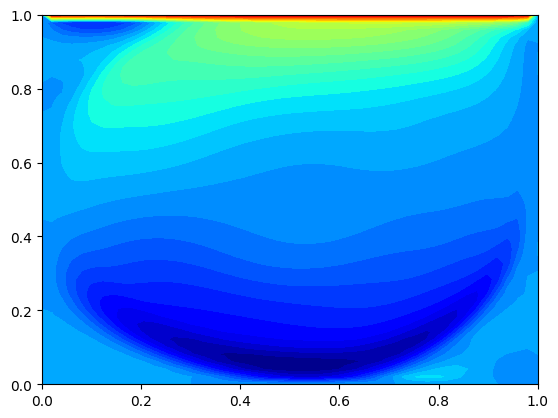

In [10]:
X, Y = np.meshgrid(x, y)
from scipy.interpolate import griddata
from IPython.display import clear_output
from matplotlib import animation
# fig, axs = plt.subplots(1, 3, figsize=(7.5, 6), sharey=False)


N_resolution = 40
### Plot u ###
# cp_u = axs[0, 0].contourf(X, Y, u, N_resolution)
print(x.shape, y.shape, u.shape)

xi=np.linspace(min(x),max(x))
yi=np.linspace(min(y),max(y))
xi,yi=np.meshgrid(xi,yi)

t = 501
# for i in range(t):
fig, ax = plt.subplots()
artists = []
for i in range(501):
    z = u[:,i]
    zi=griddata((x, y),z,(xi,yi),method='cubic')
    surf = ax.contourf(xi,yi,zi,N_resolution)
    surf.set_cmap('jet')
    # fig.colorbar(surf)
    artists.append(surf)

ani = animation.ArtistAnimation(fig=fig, artists=artists, interval=400)
plt.show()
    # clear_output(wait=True)
    # ax.clear()
    # plt.pause(0.0001)÷
# import matplotlib
# matplotlib.animation.Animation.save(fig, "test.gif")
    # plt.clf()